In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pylab as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import Normalizer, MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, SelectFromModel, VarianceThreshold, f_regression
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")
np.seterr(divide='ignore', invalid='ignore')

SEEDER = 7

# Initializing and working with data

In [2]:
df = pd.read_csv('data.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## General data review

In [3]:
df_rows, df_cols = df.shape
print(f"Number of records:\t{df_rows}\nNumber of attributes:\t{df_cols}\n")

Number of records:	1460
Number of attributes:	81



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

print(f"Number of quantitative features: {len(quantitative)}\
      \nNumber of qualitative features:  {len(qualitative)}")

Number of quantitative features: 38      
Number of qualitative features:  43


In [6]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [7]:
# count the number of unique values
df.nunique().sort_values()

CentralAir         2
Utilities          2
Street             2
Alley              2
BsmtHalfBath       3
                ... 
1stFlrSF         753
BsmtUnfSF        780
GrLivArea        861
LotArea         1073
Id              1460
Length: 81, dtype: int64

Check target value `SalePrice`

In [8]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

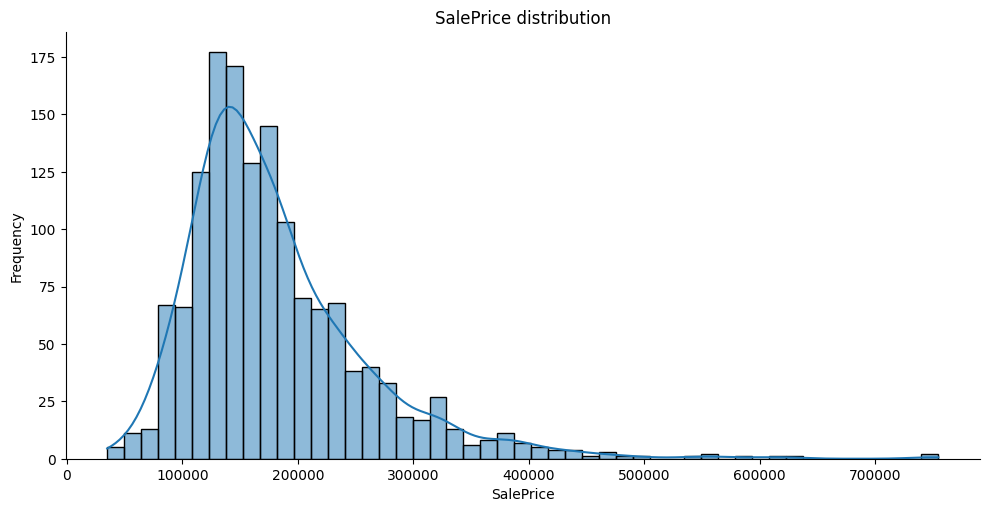

In [9]:
sns.displot(data=df, x="SalePrice", kde=True, aspect=2)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.show()

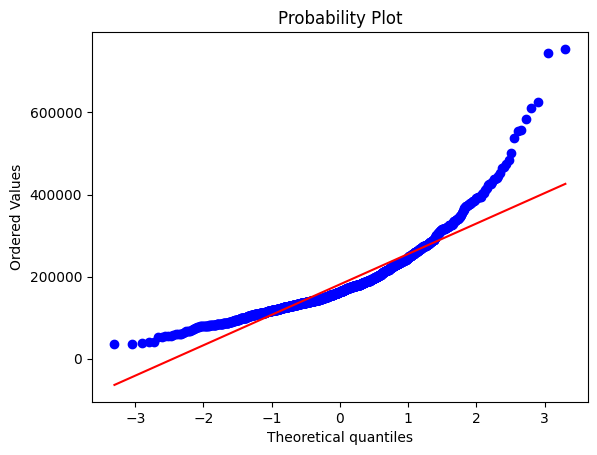

In [10]:
_ = scipy.stats.probplot(df['SalePrice'], plot=plt)

Check logarithmic target value `SalePrice`

In [11]:
log_df = np.log(df["SalePrice"])

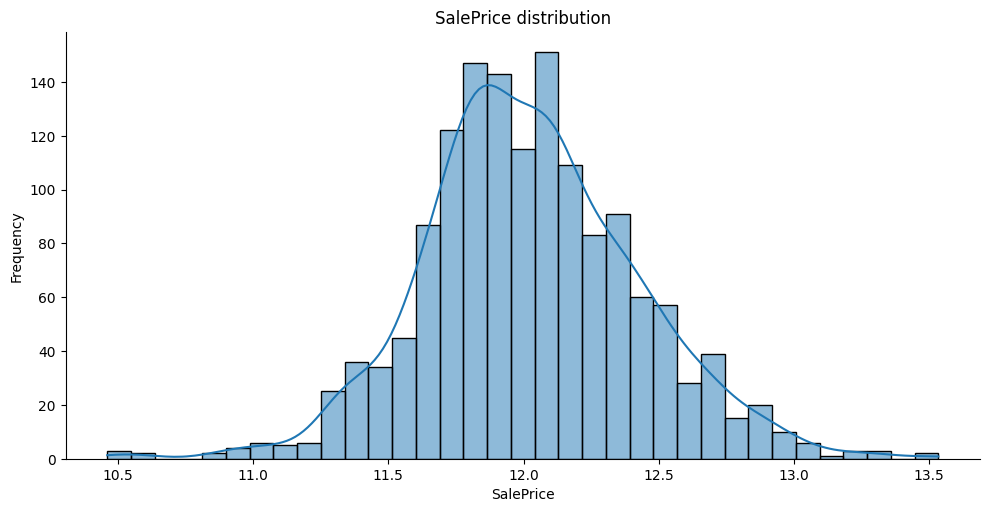

In [12]:
sns.displot(log_df, kde=True, aspect=2)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.show()

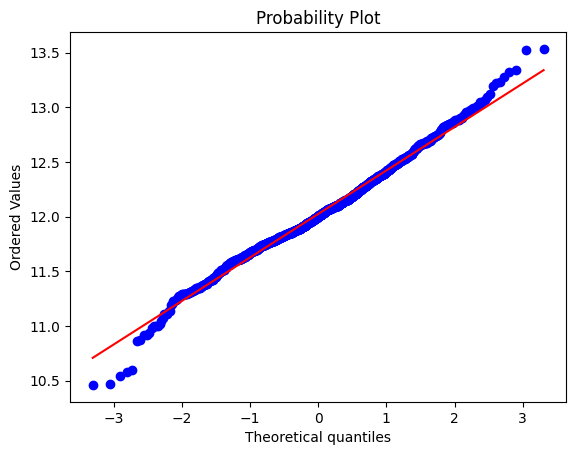

In [13]:
_ = scipy.stats.probplot(log_df, plot=plt)

## Data cleaning

In [14]:
# setting a unique value as an index
df = df.set_index('Id')

In [15]:
# count the number of missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()*100/len(df)).round(2).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total number of missing records', 'Percent (%)'])
missing_data

,Total number of missing records,Percent (%)
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
...,...,...
Heating,0,0.00
HeatingQC,0,0.00
MSZoning,0,0.00
1stFlrSF,0,0.00


In [16]:
# we may drop them if it is necessary
# df = df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence']) 

In [17]:
# check the number of const values (min = max)
df.loc[:,df.apply(pd.Series.nunique) == 1]

""
Id
1
2
3
4
5
...
1456
1457
1458


In [18]:
# transform all NA values into 0
df.loc[:, df.dtypes == 'float64'] = df.select_dtypes(['float64']).fillna(0)

In [19]:
# transform all objects into categories
df.loc[:, df.dtypes == 'object'] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [20]:
# df.loc[:, df.dtypes == 'int64'] = df.select_dtypes(['int64']).apply(lambda x: x.astype('float64'))

## Splitting the dataset

In [21]:
def splitDataset(data):
    predictors = data.drop(columns=['SalePrice'])
    return train_test_split(predictors, data['SalePrice'], test_size=0.25, random_state=SEEDER)

## Price prediction

Function `performPrediction` predicts `SalePrice` with the use of linear regression model and counts root-mean-squared error (RMSE) value.

In [22]:
def performPrediction(X_train, X_test, Y_train, Y_test, printing=True):

    # training Linear Regression model
    model = LinearRegression()
    model.fit(X_train, Y_train) 

    # calculate RMSLE
    rmsle_train = np.sqrt(mean_squared_error(model.predict(X_train), Y_train))
    rmsle_test = np.sqrt(mean_squared_error(model.predict(X_test), Y_test))

    if printing:
        print('>> RMSLE <<')
        print(f'Training dataset:\t{(rmsle_train).round(3)}')
        print(f'Testing dataset:\t{(rmsle_test).round(3)}')

    return rmsle_train, rmsle_test

# Prediction making on the original data

We will check our prediction efficiency on the original dataset (all columns except for the categorical ones - they will be transformed and used later)

In [23]:
original_x_train, original_x_test, original_y_train, original_y_test = splitDataset(df)
# delete categorical columns
original_x_train = original_x_train.select_dtypes(include=np.number)
original_x_test = original_x_test.select_dtypes(include=np.number)

print('>> Length <<')
print('Training dataset:\t', len(original_x_train), '\nTesting dataset:\t', len(original_x_test), '\n')

>> Length <<
Training dataset:	 1095 
Testing dataset:	 365 



In [24]:
performPrediction(original_x_train, original_x_test, original_y_train, original_y_test)

>> RMSLE <<
Training dataset:	34637.118
Testing dataset:	34539.283


(34637.11836623533, 34539.28261266221)

**As we may notice the performance is really bad, because error value is high.**

# Feature transformation

First of all, we will try to count the total living area (in square feet).

In [25]:
df['TotalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

Then we will use target logarithmic transformation.

In [26]:
df["SalePrice"] = np.log(df["SalePrice"])

And after all we will change categorical values to the numeric one (each category marker in separate column).

In [27]:
df = pd.get_dummies(df)

df_rows, df_cols = df.shape
print(f"Number of records:\t{df_rows}\nNumber of attributes:\t{df_cols}\n")

Number of records:	1460
Number of attributes:	290



After these transformations we will check the prediction performance one more time. As we can see **it improves significantly - up to 16%**.

In [28]:
x_train, x_test, y_train, y_test = splitDataset(df)
print('>> Length <<')
print('Training dataset:\t', len(x_train), '\nTesting dataset:\t', len(x_test), '\n')

>> Length <<
Training dataset:	 1095 
Testing dataset:	 365 



In [29]:
performPrediction(x_train, x_test, y_train, y_test)

>> RMSLE <<
Training dataset:	0.086
Testing dataset:	0.161


(0.086357755669096, 0.16109269422920164)

Additionally, in the next steps we will try to use a few different transformers.

In [30]:
def normalizeData(model, X_train, X_test, Y_train, Y_test):
    columns_to_normalize = pd.DataFrame(X_train).select_dtypes(include=['float64']).columns
    model.fit(X_train[columns_to_normalize])

    new_X_train = model.transform(X_train[columns_to_normalize])
    new_X_test = model.transform(X_test[columns_to_normalize])

    return performPrediction(new_X_train, new_X_test, Y_train, Y_test)

In [31]:
# Normalizer
normalizeData(Normalizer(), x_train, x_test, y_train, y_test)

>> RMSLE <<
Training dataset:	0.348
Testing dataset:	0.36


(0.34776943366975027, 0.3596155169583766)

In [32]:
# MinMaxScaler
normalizeData(MinMaxScaler(), x_train, x_test, y_train, y_test)

>> RMSLE <<
Training dataset:	0.335
Testing dataset:	0.345


(0.3345527663406589, 0.3451982502894397)

In [33]:
# MaxAbsScaler
normalizeData(MaxAbsScaler(), x_train, x_test, y_train, y_test)

>> RMSLE <<
Training dataset:	0.335
Testing dataset:	0.345


(0.33455276634065895, 0.3451982502894396)

In [34]:
# StandardScaler
normalizeData(StandardScaler(), x_train, x_test, y_train, y_test)

>> RMSLE <<
Training dataset:	0.335
Testing dataset:	0.345


(0.33455276634065895, 0.3451982502894397)

In [35]:
# RobustScaler
normalizeData(RobustScaler(), x_train, x_test, y_train, y_test)

>> RMSLE <<
Training dataset:	0.335
Testing dataset:	0.345


(0.33455276634065895, 0.3451982502894396)

As we may notice **they gives us even worse results (more than 30% of errors) than the one before**. That is why they won't be used in the next steps. 

# Dimensionality reduction

In this part we will try to perform feature selection of the important dataset columns.

## K-Best method

In [36]:
results = {}

# try to find the best K value
for k in range(1, 200, 10):
    model = SelectKBest(score_func=f_regression, k=k)
    kbest_X_train = model.fit_transform(x_train, y_train)
    kbest_X_test = model.transform(x_test)
    
    # check the performance
    rmsle_train, rmsle_test =  performPrediction(kbest_X_train, kbest_X_test, y_train, y_test, False)
    results[k] = rmsle_test 

min_error = min(results.values())
best_k = min(results, key=results.get)
print(f'Best RMSLE value:\t{round(min_error, 3)}\nK value:\t\t{best_k}')

Best RMSLE value:	0.134
K value:		121


## Variance method

In [37]:
results = {}

# try to find the best threshold value
for t in np.arange(0, 1, 0.01):
    model = VarianceThreshold(threshold=t)
    var_X_train = model.fit_transform(x_train, y_train)
    var_X_test = model.transform(x_test)
    
    # check the performance
    rmsle_train, rmsle_test =  performPrediction(var_X_train, var_X_test, y_train, y_test, False)
    results[t] = rmsle_test 

min_error = min(results.values())
best_t = min(results, key=results.get)
print(f'Best RMSLE value:\t{round(min_error, 3)}\nThreshold value:\t{best_t}')

Best RMSLE value:	0.134
Threshold value:	0.01


## Weights importance method

In [38]:
model = SelectFromModel(LinearRegression())
model.fit(x_train, y_train)

# check the selected columns
feature_index = model.get_support()
feature_name = x_train.columns[feature_index]
print(f'Number of selected features: {len(feature_name)}\n')

sel_X_train = model.transform(x_train)
sel_X_test = model.transform(x_test)

# check the performance
performPrediction(sel_X_train, sel_X_test, y_train, y_test)

Number of selected features: 77

>> RMSLE <<
Training dataset:	0.252
Testing dataset:	503843099613.751


(0.25249598299568904, 503843099613.7508)

As we may see, **two methods (** `SelectKBest` **and** `VarianceThreshold` **) improves prediction performance up to 13.4%, so we may use any of them in the future**. The worst method is `SelectFromModel` and it may not be used, as it makes the results even worse.

## PCA

In [39]:
# function that helps to plot error changes depending on the number of components

def plotResults(r_dict):
    errors = r_dict.items()
    x, y = zip(*errors)

    plt.plot(x, y, color="lightcoral")
    plt.xlabel('N')
    plt.ylabel('RMSLE')
    plt.title('RMSLE dependency on the number of PCA components')
    plt.show()

In [40]:
def selectFeature(X_train, X_test, Y_train, Y_test, limit):
    results = {}

    # check different number of components
    for n in range(1, limit, 5):
        model = PCA(n_components=n, random_state=SEEDER)

        pca_X_train = model.fit_transform(X_train, Y_train)
        pca_X_test = model.transform(X_test)

        # check the performance
        rmsle_train, rmsle_test =  performPrediction(pca_X_train, pca_X_test, Y_train, Y_test, False)
        results[n] = rmsle_test 

    min_error = min(results.values())
    best_n = min(results, key=results.get)
    print(f'Best RMSLE value:\t\t{round(min_error, 3)}\nNumber of PCA components:\t{best_n}')
    return results

In [51]:
results = selectFeature(x_train, x_test, y_train, y_test, 200)

Best RMSLE value:		0.13
Number of PCA components:	86


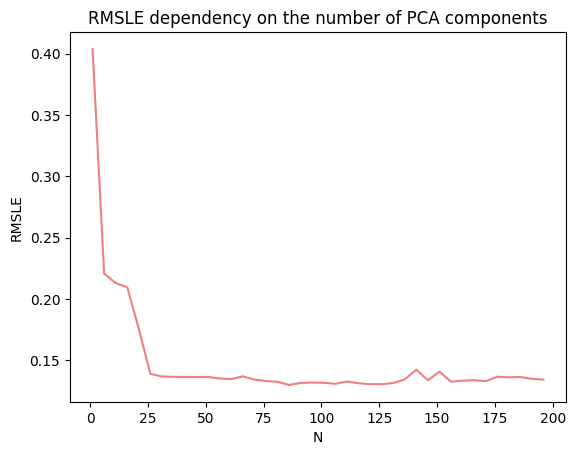

In [52]:
plotResults(results)

In [53]:
results = selectFeature(x_train, x_test, y_train, y_test, 290)

Best RMSLE value:		0.13
Number of PCA components:	86


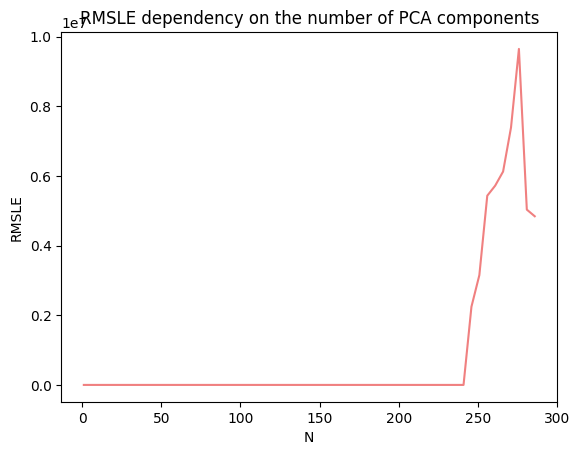

In [54]:
plotResults(results)

As we may see, **the best result of the prediction is obtained with PCA method (for 86 components). Error value is about 13%**. So, we will try to use it with original data...

Also, we may notice, error value of PCA method decreases very rapidly at the beginning (up to n=25) and then remains low till ~230 components. However the next graph shows us that after some moment error starts to get larger and larger very fast, and then drops again (see second graph).

In [44]:
results = selectFeature(original_x_train, original_x_test, original_y_train, original_y_test, 40)

Best RMSLE value:		34217.506
Number of PCA components:	26


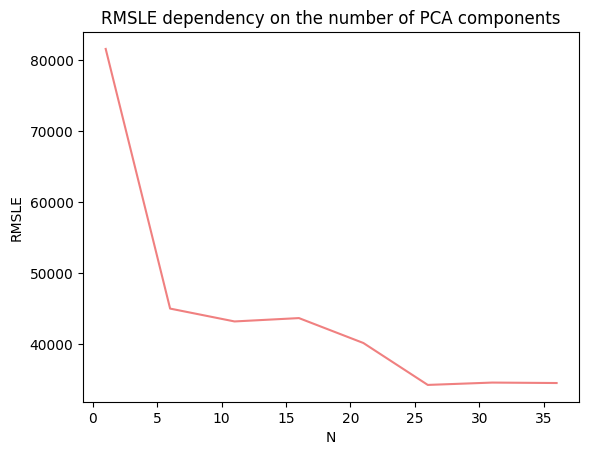

In [45]:
plotResults(results)

**The results of prediction on original data did not improve.**

# Conclusion

After testing a lot of different method we may say that the best prediction performance of linear regression model was obtained on the transformed data (initial few steps - without further normalization, as they did not give us necessary result improvement) with the use of PCA for feature selection on the transformed columns. **Final RMSLE is 0.13** (decreased from 0.16).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=baa13af3-9af4-4528-9198-7991b33be122' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>